<table class="tfo-notebook-buttons" align="left">
<td style="border: none;">
<a target="blank" href="https://colab.research.google.com/github/Hari31416/Internship/blob/main/HW Saver LLP/Assignment 1/Files/assignment.ipynb?hl=en"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" width="28" height="28"/>Run on Google Colab</a></td>
<td style="border: none;">
<a target="blank" href="https://github.com/Hari31416/Internship/blob/main/HW Saver LLP/Assignment 1/Files/assignment.ipynb"><img src="https://cdn.icon-icons.com/icons2/2368/PNG/512/github_logo_icon_143772.png" width="28" height="28"/>View on Github</a></td>
<td style="border: none;">
</table>


<div>
<h1 id="Contents">Contents<a href="#Contents"></a></h1>
        <ol>
        <li><a class="" style="color:green" href="#Imports">Imports</a></li>
<li><a class="" style="color:green" href="#Reading-Image-and-Preprocessing">Reading Image and Preprocessing</a></li>
<ol><li><a class="" style="color:green" href="#Reading-Image">Reading Image</a></li>
<li><a class="" style="color:green" href="#Preprocessing">Preprocessing</a></li>
</ol><li><a class="" style="color:green" href="#Detecting-the-Checkbox">Detecting the Checkbox</a></li>
<ol><li><a class="" style="color:green" href="#The-y-coordinates-of-the-top-and-bottom-side-of-the-checkbox">The y coordinates of the top and bottom side of the checkbox</a></li>
<li><a class="" style="color:green" href="#The-x-coordinates-of-the-left-and-right-side-of-the-checkbox">The x coordinates of the left and right side of the checkbox</a></li>
</ol><li><a class="" style="color:green" href="#Determining-Whether-the-Checkbox-is-Checked-or-Not-(The-Bonus-Part)">Determining Whether the Checkbox is Checked or Not (The Bonus Part)</a></li>
<li><a class="" style="color:green" href="#Putting-it-all-together">Putting it all together</a></li>
<li><a class="" style="color:green" href="#Detecting-the-Checkboxes">Detecting the Checkboxes</a></li>
</ol>
</div>

To get the final cropped images in zip, click on the link below:

<a style="color:green" href="https://github.com/Hari31416/Internship/raw/495dffe9ec31a7c02f742a3bb1e4e042ca4c0f4b/HW%20Saver%20LLP/Assignment%201/Files/Raw_Dataset/cropped/clean_images.zip">Download Images</a>

To get the codes of this notebook in .py file, click on the link below:

<a style="color:green" href="https://github.com/Hari31416/Internship/raw/495dffe9ec31a7c02f742a3bb1e4e042ca4c0f4b/HW%20Saver%20LLP/Assignment%201/Files/assignment.py">Download .py</a>

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os

# Reading Image and Preprocessing

Before we are able to detect the checkbox, we need to do some preprocessing to the image. Things we need to do first are:
1. Read the image and convert it to `numpy` array.
2. Convert the image to grayscale.
3. Convert the image to binary.
4. Crop the image (if necessary).

The first three steps can easily be done using the `opencv` library. We can use `opencv`'s `imread` function to read the image, and then convert it to grayscale using `cvtColor`. Using `threshold` we can convert the image to binary image. The cropping of image is trivial and can be realized using indexing.

## Reading Image

In [2]:
#Reading Image
image = cv.imread("Raw_Dataset\img-1.jpg")

## Preprocessing

In [3]:
THRESHOLD = 140 #Threshold value for the image
#convert image into greyscale mode
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

#find threshold of the image
#thresholding the image, 1 is the max value
_, binary_image = cv.threshold(gray_image, 140, 1, cv.THRESH_BINARY) 

Since we need to do these steps for all the images, we'll define a function to do this. The function also does cropping if required.

In [4]:
def get_image_ready(img_path, threshold=120, crop=(5, 5)):
    """
    Does preprocessing on the image
    
    Parameters
    ----------
    img_path : str
        Path to the image
    threshold : int, optional
        Threshold value for the image. The default is 120.
    crop : tuple, optional
        x and y crop pixels for the image. The default is (5,5).

    Returns
    -------
    numpy.ndarray
        Image after preprocessing
    """
    img = cv.imread(img_path)
    if crop:
        img = img[crop[1]:img.shape[0]-crop[1], crop[0]:img.shape[1]-crop[0]]
    gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    _, binary_image = cv.threshold(gray_image, threshold, 1, cv.THRESH_BINARY)
    return binary_image

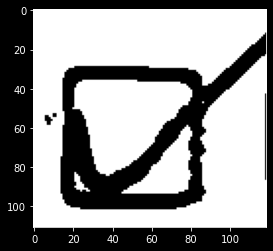

In [5]:
image = get_image_ready("Raw_Dataset\img-1.jpg")
plt.imshow(image, cmap='gray');

# Detecting the Checkbox

One way to detect the checkbox is using the `openCV`'s `findContours` function. This function takes in an image and returns the contours of the image. The contours are the outlines of the objects in the image. I tried the method but it turns out that the function is not working very well for almost all of the images. The reason is that the contours are not very accurate as they are not very clear and we have a lot of noise. Due to this, I implemented a method to detect the checkbox from scratch.

The idea behind the method I implemented is simple. The image returned by the function `get_image_ready` is a binary image. The image contains a bunch of zeros and ones. Ones for a white pixels and zeros for black pixels. The basic idea is do get the coordinate of the first black pixel and then the last black pixel. The difference between the two pixels is the width of the checkbox. While the x coordinate of the first black pixel is the x coordinate of the top left corner of the checkbox and the x coordinate of the last black pixel is the x coordinate of the top right corner of the checkbox. Looping through the column gives the same values but for the y coordinates.

There are multiple way to implement this. The way I did this is:
1. I choose the middle row and column of the image to loop through.
2. On the middle column, used `numpy`'s `nonzero` function to get the indices of the pixels that are black.
3. Subtracted every element in the array from the next and the previous elements. This gave me the y coordinates of the top and bottom side of the checkbox.
4. Used the same process for the middle row and got the x coordinates of the left and right side of the checkbox.
5. Using these four coordinates, I could draw a bounding box for the checkbox.

## The y coordinates of the top and bottom side of the checkbox

In [6]:
def y_coordinates(img, a):
    """
    Gets the y coordinates of the top and bottom sides of the checkbox

    Parameters
    ----------
    img : numpy.ndarray
        Image to be processed
    a : int
        index of the column to be looped over
    
    Returns
    -------
    tuple ((x,yt), (x,yb))
        coordinates of the top and bottom of the checkbox
    """
    col = np.nonzero(img[:, a])[0]
    colshifted = np.concatenate([col[1:], np.array([0])])
    c1 = col[(-col+colshifted>1)][0]
    colshifted = np.concatenate([ np.array([0]), col[:-1]])
    c2 = col[(col-colshifted>1)][-1]
    return (a, c1), (a, c2)

In [7]:
y_coordinates(img=image, a=60)

((60, 29), (60, 102))

30 is the height of the top side of the checkbox and 100 for the bottom side. I've hardcoded the value of `a` here. Later I'll fix it.

## The x coordinates of the left and right side of the checkbox

In [8]:
def x_coordinates(img, a):
    """
    Gets the x coordinates of the left and right sides of the checkbox

    Parameters
    ----------
    img : numpy.ndarray
        Image to be processed
    a : int
        index of the row to be looped over
    
    Returns
    -------
    tuple ((xl,y), (xr,y))
        coordinates of the left and right of the checkbox
    """
    row1 = np.nonzero(img[a, :])[0]
    row1shifted = np.concatenate([row1[1:], np.array([0])])
    c1 = row1[(-row1+row1shifted>1)][0]
    row1shifted = np.concatenate([ np.array([0]), row1[:-1]])
    c2 = row1[(row1-row1shifted>1)][-1]
    return (c1,a), (c2,a)

In [9]:
x_coordinates(img=image, a=60)

((14, 60), (87, 60))

# Determining Whether the Checkbox is Checked or Not (The Bonus Part)

Once we have the bounding box for the checkbox, determining whether the checkbox is checked or not is quite straightforward. I am assuming that the box is check if there are some black pixels inside the box (that is, there is any writing inside the box). I have implemented this by following the steps:
1. Crooped about 3/4th of the region inside the checkbox.
2. Determined the number of pixels which are white in the cropped image.
3. If the number of white pixels is less than a certain threshold, the checkbox is checked. If not, it is unchecked. I used this threshold as 35%.

In [10]:
def checked(img, percent=35):
    """
    Returns `True` if the checkbox is checked, `False` otherwise

    Parameters
    ----------
    img : numpy.ndarray
        Image to be processed
    percent : int, optional
        Percentage of the image to be checked. The default is 20.

    Returns
    -------
    bool
        `True` if the checkbox is checked, `False` otherwise
    """
    h,w = img.shape
    #The area of cropped image will be 1/4 of the original image
    all_pixels = 3*h*w/4
    h_check = h//8
    w_check = w//8
    #cropping the center part of image
    white_pixels = (img[h_check:h-h_check, w_check:w-w_check]).sum() 
    white_percent = white_pixels*100/all_pixels
    black_percent = 100 - white_percent
    return black_percent > percent


# Putting it all together

Let's put all the steps together to get a final function that detects the checkbox.

In [11]:
def putting_together(
    img_path,
    threshold=140,
    point=None,
    crop=(5, 5),
    percent=35,
    plot=True,
    save=False,
    pad=0,
):
    """
    Detects the checkbox as well as whether it is checked or not

    Parameters
    ----------
    img_path : str
        Path to the image
    threshold : int, optional
        Threshold value for the image. The default is 140.
    point : tuple, optional
        x and y coordinates to loop over in `x_coordinates` and `y_coordinates` function. The default is None.
    crop : tuple, optional
        x and y crop pixels for the image. The default is (5,5).
    percent : int, optional
        Percentage used in the `checked` function. The default is 20.
    plot : bool, optional
        Whether to plot the image. The default is True.
    save : bool, optional
        Whether to save the cropped image. The default is False.
    pad : int, optional
        Padding to be added to the final cropped. The default is 0.
    """
    # Getting the image ready
    img_original = cv.imread(img_path)
    img = get_image_ready(img_path, threshold, crop=crop)

    # Getting the coordinates of the checkbox if not given
    if point is None:
        h, w = img.shape
        point = (w // 2, h // 2)
    (x, yt), (x, yb) = y_coordinates(img, point[1])
    (xl, y), (xr, y) = x_coordinates(img, point[0])

    # Determining whether the checkbox is checked or not
    checked_or_not = checked(
        img[crop[1] + yt : crop[1] + yb, crop[0] + xl : crop[0] + xr], percent
    )

    # Plotting the image
    if plot:
        fig, axes = plt.subplots(1, 2)
        # Adding a supertitle
        fig.suptitle(f"{img_path}", fontsize=16)

        # Plotting the image with the top-left and bottom-right coordinates
        axes[0].imshow(img_original)
        axes[0].scatter(crop[0] + xl, crop[1] + yt, c="r", s=30)
        axes[0].scatter(crop[0] + xr, crop[1] + yb, c="r", s=30)
        axes[0].scatter(crop[0] + xl, crop[1] + yt, c="r", s=30)
        axes[0].scatter(crop[0] + xr, crop[1] + yb, c="r", s=30)
        axes[0].set_title("Original Image")

        # Plotting the cropped image
        img_f = img_original[
            crop[1] + yt - pad : crop[1] + yb + pad,
            crop[0] + xl - pad : crop[0] + xr + pad,
            :,
        ]
        axes[1].imshow(img_f)
        axes[1].set_title("Cropped Image")
        # Adding whether the checkbox is checked or not
        color = "g" if checked_or_not else "b"
        axes[1].annotate(
            f"Checked: {checked_or_not}",
            (0, 0),
            (10, -20),
            xycoords="axes fraction",
            textcoords="offset points",
            va="top",
            fontsize=14,
            color=color,
        )

    if save:
        # Saving the image
        img_f = img_original[
            crop[1] + yt - pad : crop[1] + yb + pad,
            crop[0] + xl - pad : crop[0] + xr + pad,
            :,
        ]
        img_name = img_path.split(os.path.sep)[-1]
        img_dir = f"{os.path.sep}".join(img_path.split(os.path.sep)[:-1])
        img_dir = os.path.join(img_dir, "cropped", "clean_"+img_name)
        plt.imsave(img_dir, img_f)
    return img_f, checked_or_not


# Detecting the Checkboxes

In [12]:
images_dir = "Raw_Dataset"
images = os.listdir(images_dir)
images = [os.path.join(images_dir, i) for i in images if i.endswith(".jpg")]
checked_dict = {}
for img in images:
    img_f, checked_ = putting_together(img, plot=False, save=True)
    checked_dict[img] = checked_

In [13]:
checked_dict

{'Raw_Dataset\\img-1.jpg': True,
 'Raw_Dataset\\img-2.jpg': True,
 'Raw_Dataset\\img-3.jpg': True,
 'Raw_Dataset\\img-4.jpg': True,
 'Raw_Dataset\\img-5.jpg': True,
 'Raw_Dataset\\img-6.jpg': True,
 'Raw_Dataset\\img-7.jpg': False,
 'Raw_Dataset\\img-8.jpg': True,
 'Raw_Dataset\\img-9.jpg': True}

We can see that all the checkboxes other than 7 are checked!

Here are all the checkboxes.

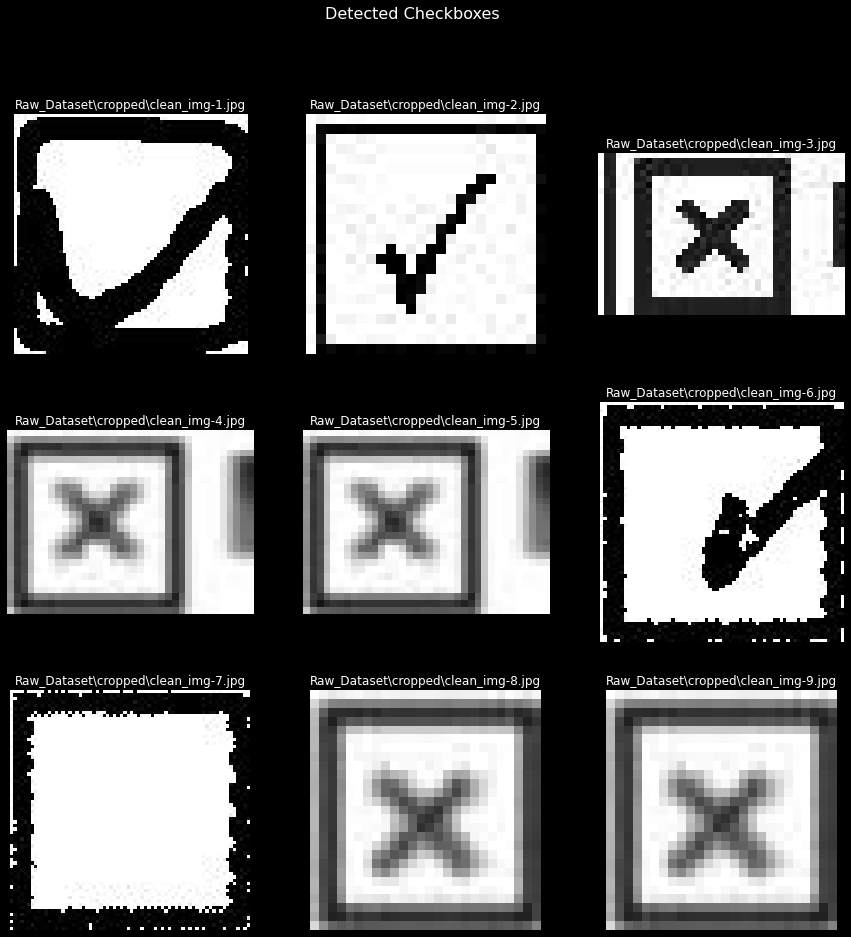

In [14]:
cleaned_imgs = os.listdir(os.path.join(images_dir, "cropped"))
cleaned_imgs = [os.path.join(images_dir, "cropped", i) for i in cleaned_imgs if i.endswith(".jpg")]
plt.figure(figsize=(15, 15))
plt.suptitle("Detected Checkboxes", fontsize=16)
for i, img in enumerate(cleaned_imgs):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cv.imread(img))
    plt.title(f"{img}")
    plt.axis("off")
plt.show()